In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/Users/Velociraptor/titanic/train.csv")
test = pd.read_csv("/Users/Velociraptor/titanic/test.csv")
gender_submission = pd.read_csv("/Users/Velociraptor/titanic/gender_submission.csv")

data = {"train": train, "test": test}

In [3]:
data["train"].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
################# DEALING WITH TITLES ###################

import re
humble_titles = ['Don', 'Master', 'Dr', 'Major']

for i, data_set in data.items():
    titles = []
    for name in data_set['Name']:
        if re.search(' (.*)\. ', name).group(1) in humble_titles:
            titles.append(1)
        else:
            titles.append(0)
    data_set["Title"] = titles

In [5]:
################# DEALING WITH GENDER ####################

gender = {'male':0, 'female':1}

for i, data_set in data.items():
    data_set['Sex_binary'] = [gender[x] for x in data_set['Sex']]

############### DEALING WITH EMBARKED INFO ###############

embarked = {np.nan:0, 'S':1, 'C':2, 'Q':3}

for i, data_set in data.items():
    try:
        data_set['Embarked_class'] = [embarked[x] for x in data_set['Embarked']]
    except:
        pass

In [6]:
Cabin_class = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "T":8}

for i, data_set in data.items():
    list_cabins = []
    for cabin in data_set["Cabin"]:
        result = re.search("[A-Z]", str(cabin))
        if result == None:
            list_cabins.append(0)
        elif result != None:
            list_cabins.append(Cabin_class[result.group(0)])
     
    data_set["Cabin_class"] = pd.DataFrame(list_cabins)           

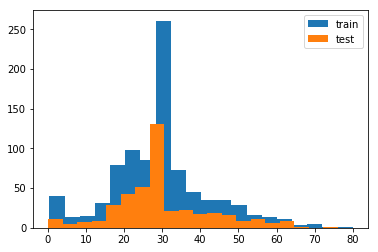

In [7]:
############### DEALING WITH NAN #####################

for i, data_set in data.items():
    data_set['Age'] = data_set['Age'].fillna(data_set['Age'].mean())
    plt.hist(data_set['Age'], bins=20, label=str(i))
    plt.legend()

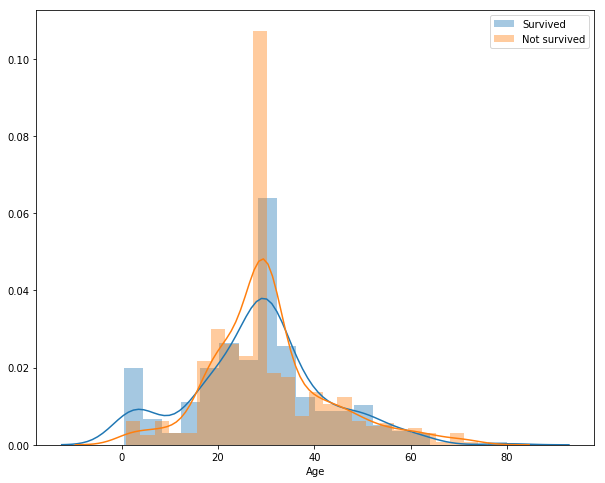

In [8]:
plt.figure(figsize=[10,8])
sns.distplot(data["train"]["Age"][data["train"]["Survived"]==1], label="Survived")
sns.distplot(data["train"]["Age"][data["train"]["Survived"]==0], label="Not survived")
plt.legend()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


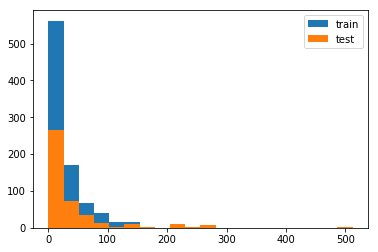

In [9]:
for i, data_set in data.items():
    print(data_set['Fare'].describe())
    plt.hist(data_set['Fare'], bins=20, label=str(i))
    plt.legend()

In [10]:
#sibsp ----> Number of Siblings/Spouses Aboard

#parch ----> Number of Parents/Children Aboard

for i, data_set in data.items():    
    print("\n\n"+40*"@"+f"\t{str(i)}\t"+40*"@")
    print(data_set['SibSp'].describe())
    print(data_set['Parch'].describe())




@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@	train	@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@	test	@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
count    418.000000
mean       0.392344
std        0.981429
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: Parch, dtype: float64


In [41]:
import tensorflow
print(tensorflow.__version__)

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()

#Finally I decided to drop "Embarked_class" and "Cabin_class" columns because they decrease the score evaluated on 
#test set.

X = data["train"].drop(columns=["PassengerId", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"])
print(X.head(5))
X = scaler.fit_transform(X)

y = data["train"]["Survived"]
y = to_categorical(y, num_classes=None)

print(f'Independent variables matrix size:\t{X.shape}\nDependent variable matrix size:\t{y.shape}')

2.1.0
   Pclass   Age  SibSp  Parch     Fare  Title  Sex_binary  Embarked_class  \
0       3  22.0      1      0   7.2500      0           0               1   
1       1  38.0      1      0  71.2833      0           1               2   
2       3  26.0      0      0   7.9250      0           1               1   
3       1  35.0      1      0  53.1000      0           1               1   
4       3  35.0      0      0   8.0500      0           0               1   

   Cabin_class  
0            0  
1            3  
2            0  
3            3  
4            0  
Independent variables matrix size:	(891, 9)
Dependent variable matrix size:	(891, 2)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
correlation = data["train"].corr('pearson')
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_binary,Embarked_class,Cabin_class
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.016343,-0.042939,-0.030323,-0.000483
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.078296,0.543351,0.101849,0.287944
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.009150,-0.131900,0.050992,-0.570691
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.293762,-0.084153,0.001932,0.169076
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.309065,0.114631,-0.058008,-0.031973
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.217438,0.245489,-0.076625,0.037621
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.020312,0.182333,0.058462,0.337525
Title,-0.016343,0.078296,0.009150,-0.293762,0.309065,0.217438,0.020312,1.000000,-0.169664,0.000326,0.012781
Sex_binary,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,-0.169664,1.000000,0.111249,0.143517
Embarked_class,-0.030323,0.101849,0.050992,0.001932,-0.058008,-0.076625,0.058462,0.000326,0.111249,1.000000,-0.023807


In [31]:
kFold = KFold(n_splits=3, shuffle=False, random_state=432)

In [43]:
def define_model(input_shape = X.shape[1]):
    model = Sequential()
    model.add(Dense(50, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
epochs = [25, 50, 75, 100]
batch_size = [8, 16, 32, 64]


model = KerasClassifier(build_fn=define_model, verbose=0)
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kFold, verbose=1, n_jobs=1)

grid_result = grid.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.5min finished


In [34]:
print(f'Best score evaluated on train set:\t{grid_result.best_score_}\nBest parameters:\t{grid_result.best_params_}')

Best score evaluated on train set:	0.8372615178426107
Best parameters:	{'batch_size': 16, 'epochs': 25}


In [35]:
# dnn = define_model()
# model_fitted = {}
# i=1
# for train_index, test_index in kFold.split(X):
#     model_fitted[i] = dnn.fit(X[train_index], y[train_index], epochs=50, batch_size=8, )
#     i+=1

In [49]:
dnn = define_model()
history = dnn.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
891/891 [==============================] - 0s 411us/step - loss: 0.6108 - accuracy: 0.6902
Epoch 2/200
891/891 [==============================] - 0s 81us/step - loss: 0.5042 - accuracy: 0.7755
Epoch 3/200
891/891 [==============================] - 0s 90us/step - loss: 0.4619 - accuracy: 0.7935
Epoch 4/200
891/891 [==============================] - 0s 83us/step - loss: 0.4501 - accuracy: 0.8025
Epoch 5/200
891/891 [==============================] - 0s 73us/step - loss: 0.4519 - accuracy: 0.8058
Epoch 6/200
891/891 [==============================] - 0s 61us/step - loss: 0.4445 - accuracy: 0.8159
Epoch 7/200
891/891 [==============================] - 0s 73us/step - loss: 0.4360 - accuracy: 0.8103
Epoch 8/200
891/891 [==============================] - 0s 87us/step - loss: 0.4241 - accuracy: 0.8182
Epoch 9/200
891/891 [==============================] - 0s 74us/step - loss: 0.4228 - accuracy: 0.8204
Epoch 10/200
891/891 [==============================] - 0s 67us/step - loss: 0.42

891/891 [==============================] - 0s 58us/step - loss: 0.3773 - accuracy: 0.8496
Epoch 81/200
891/891 [==============================] - 0s 68us/step - loss: 0.3877 - accuracy: 0.8384
Epoch 82/200
891/891 [==============================] - 0s 55us/step - loss: 0.3869 - accuracy: 0.8451
Epoch 83/200
891/891 [==============================] - 0s 63us/step - loss: 0.3737 - accuracy: 0.8563
Epoch 84/200
891/891 [==============================] - 0s 58us/step - loss: 0.3861 - accuracy: 0.8451
Epoch 85/200
891/891 [==============================] - 0s 55us/step - loss: 0.3750 - accuracy: 0.8552
Epoch 86/200
891/891 [==============================] - 0s 60us/step - loss: 0.3864 - accuracy: 0.8406
Epoch 87/200
891/891 [==============================] - 0s 65us/step - loss: 0.3824 - accuracy: 0.8552
Epoch 88/200
891/891 [==============================] - 0s 54us/step - loss: 0.3785 - accuracy: 0.8462
Epoch 89/200
891/891 [==============================] - 0s 56us/step - loss: 0.3801 - 

891/891 [==============================] - 0s 64us/step - loss: 0.3607 - accuracy: 0.8541
Epoch 160/200
891/891 [==============================] - 0s 55us/step - loss: 0.3726 - accuracy: 0.8519
Epoch 161/200
891/891 [==============================] - 0s 58us/step - loss: 0.3678 - accuracy: 0.8485
Epoch 162/200
891/891 [==============================] - 0s 56us/step - loss: 0.3644 - accuracy: 0.8563
Epoch 163/200
891/891 [==============================] - 0s 60us/step - loss: 0.3610 - accuracy: 0.8575
Epoch 164/200
891/891 [==============================] - 0s 54us/step - loss: 0.3720 - accuracy: 0.8474
Epoch 165/200
891/891 [==============================] - 0s 55us/step - loss: 0.3660 - accuracy: 0.8485
Epoch 166/200
891/891 [==============================] - 0s 56us/step - loss: 0.3596 - accuracy: 0.8620
Epoch 167/200
891/891 [==============================] - 0s 61us/step - loss: 0.3618 - accuracy: 0.8541
Epoch 168/200
891/891 [==============================] - 0s 80us/step - loss: 

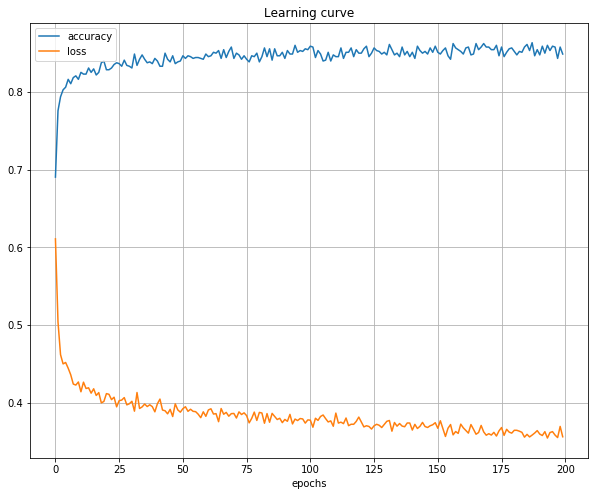

In [50]:
plt.figure(figsize=[10,8])
plt.title("Learning curve")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel("epochs")
plt.legend()
plt.grid()

In [51]:
X_test = data["test"].drop(columns=["PassengerId", "Name", "Sex", "Ticket", "Cabin","Embarked"])
print(X_test.head(5))
print("\n"+110*"@"+"\n")
X_test = scaler.fit_transform(X_test)

prediction = dnn.predict(X_test, batch_size=16)
#print(prediction)
result = [np.argmax(x) for x in prediction]
gender_submission["Survived"] = pd.DataFrame(result)

gender_submission.head(5)

   Pclass   Age  SibSp  Parch     Fare  Title  Sex_binary  Embarked_class  \
0       3  34.5      0      0   7.8292      0           0               3   
1       3  47.0      1      0   7.0000      0           1               1   
2       2  62.0      0      0   9.6875      0           0               3   
3       3  27.0      0      0   8.6625      0           0               1   
4       3  22.0      1      1  12.2875      0           1               1   

   Cabin_class  
0            0  
1            0  
2            0  
3            0  
4            0  

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
gender_submission.to_csv('titanic_result_new.csv', index=False)
